# Chapter 11: How to make predictions with a multiple regression model

In [2]:
import pandas as pd
import seaborn as sns

C:\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## The Cars dataset

In [3]:
carsData = pd.read_csv('cars.csv')

In [4]:
carsData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# How to create a simple regression model

<AxesSubplot:>

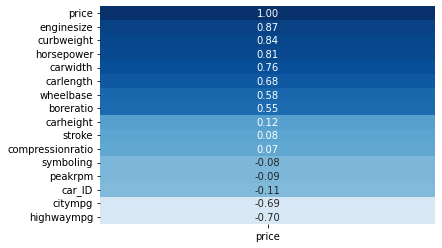

In [6]:
sns.heatmap(data=carsData.corr()[['price']].sort_values('price', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

KeyboardInterrupt: 

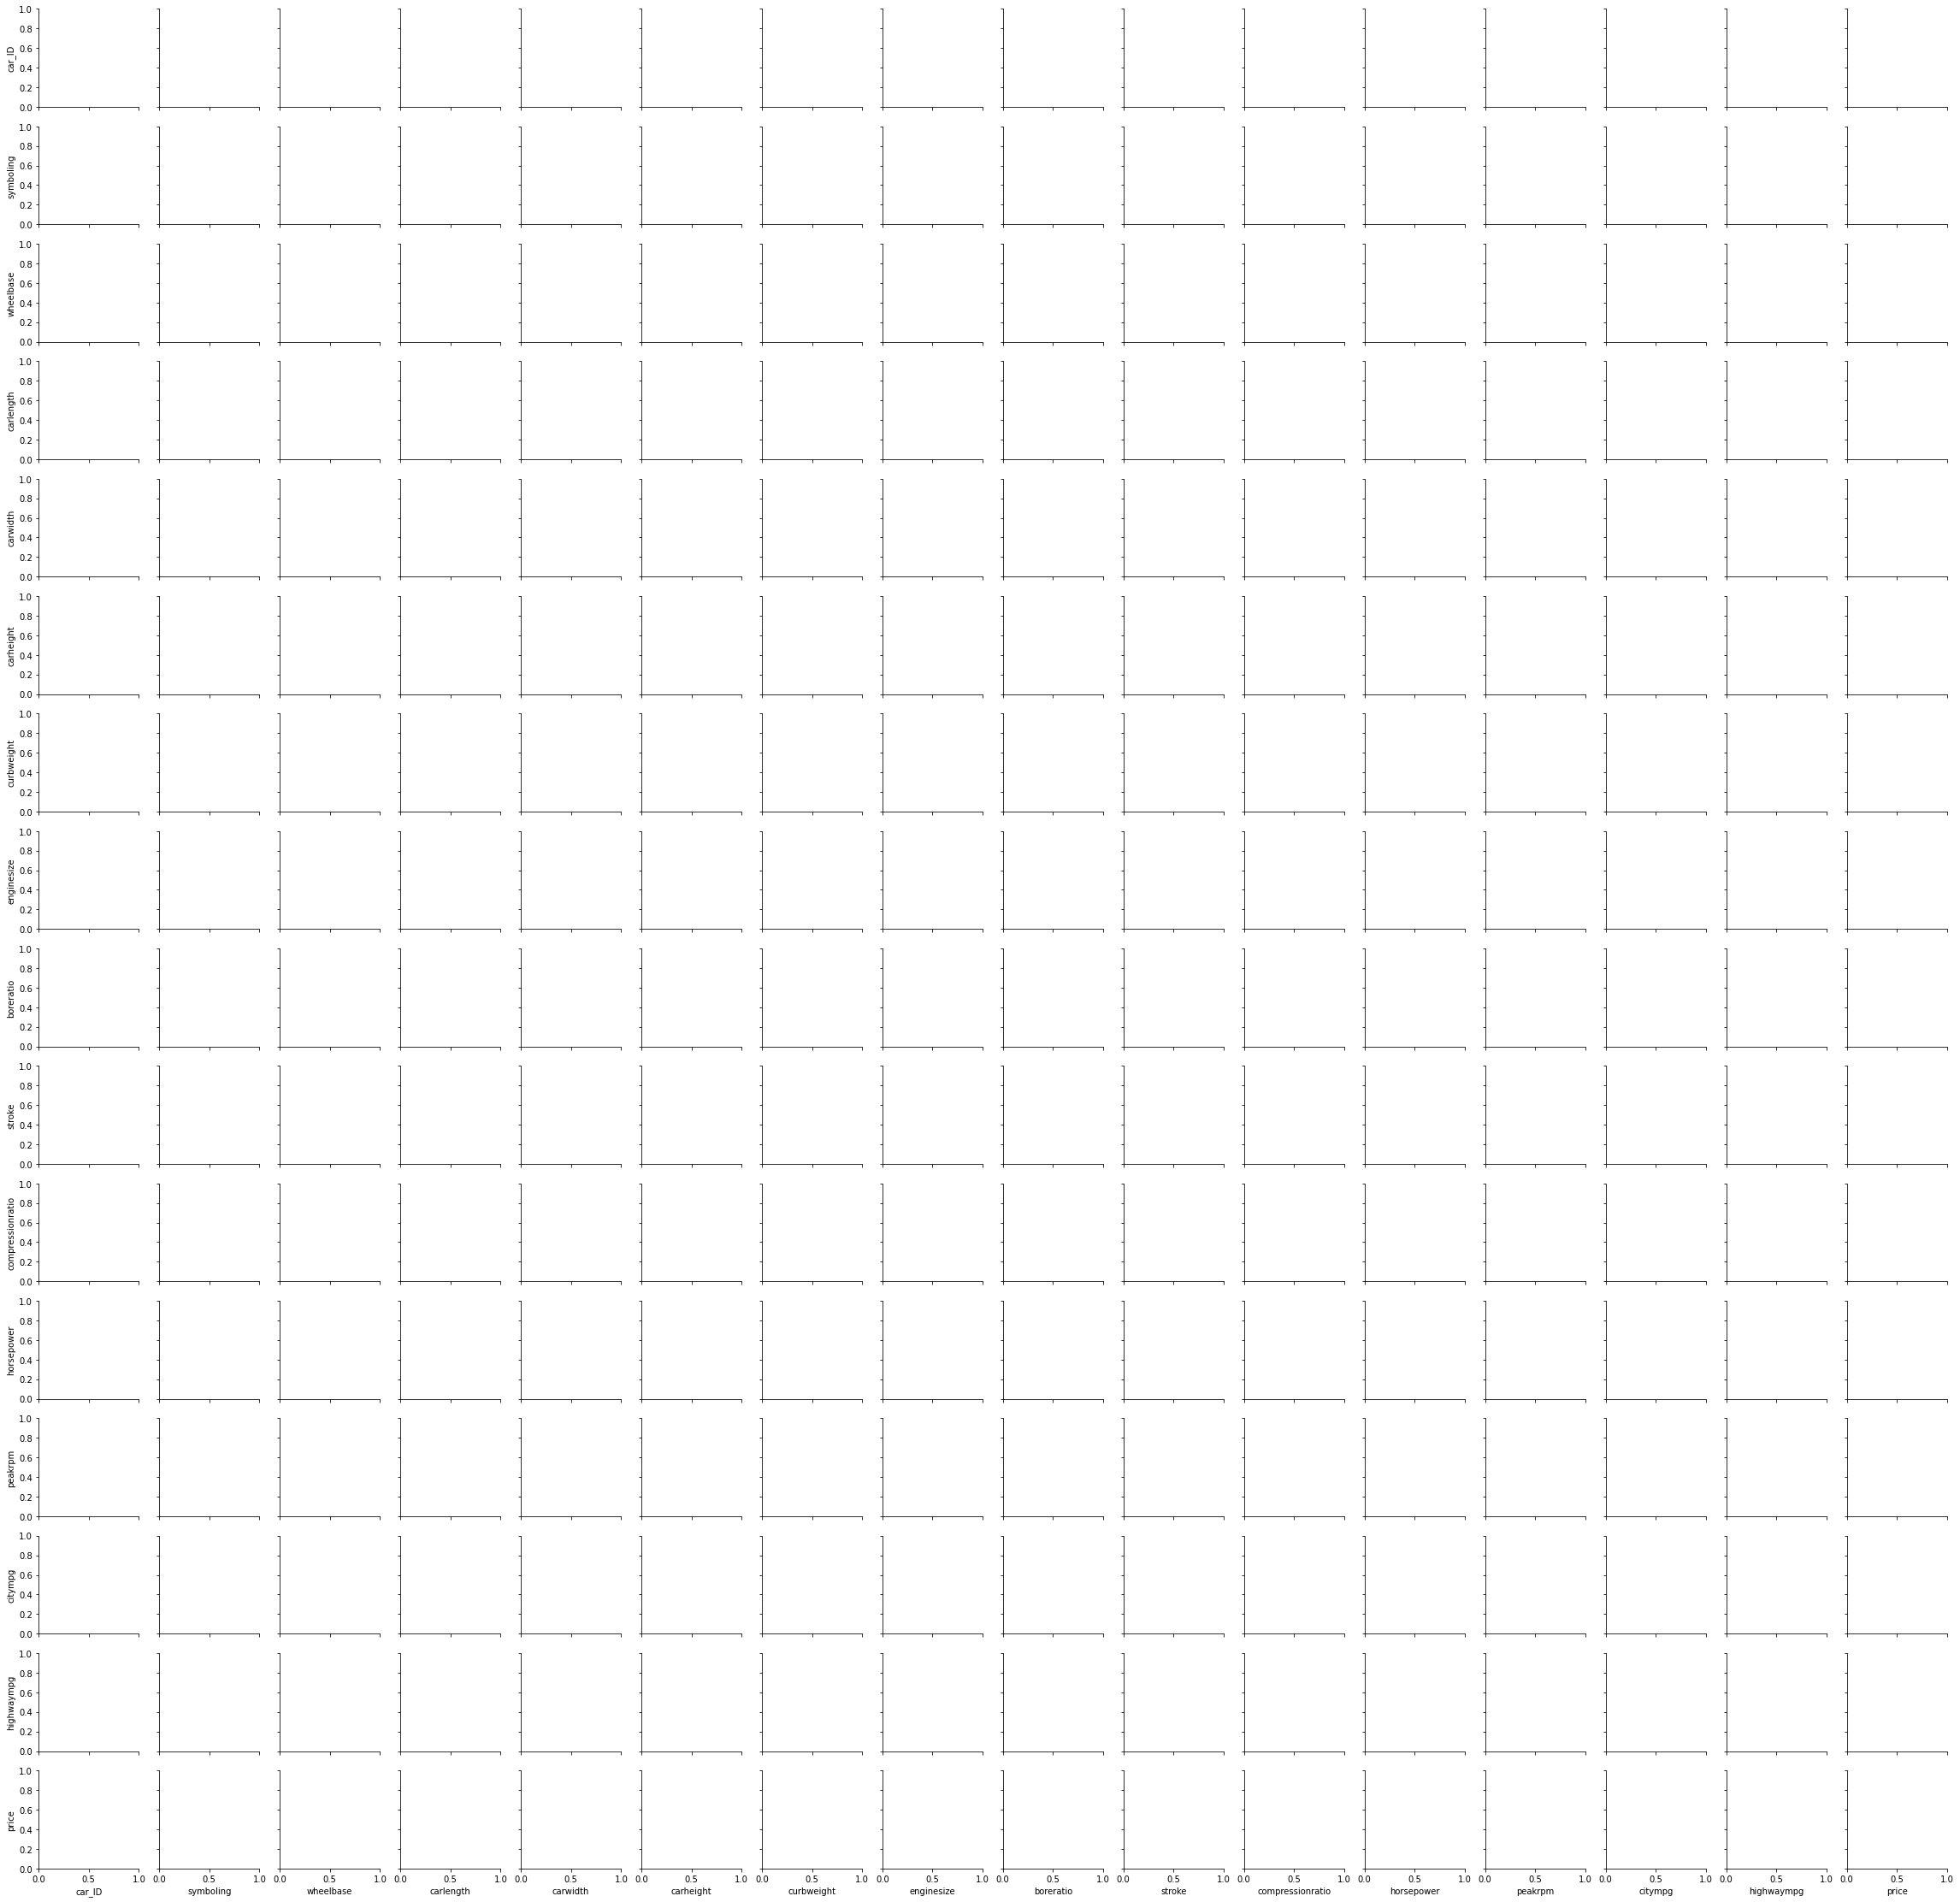

In [7]:
sns.pairplot(carsData)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize']], carsData[['price']],
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test,y_test)

0.7063964117029844

In [10]:
model.score(x_train, y_train)

0.766524123801206

In [11]:
y_predicted = model.predict(x_test)

In [12]:
# create DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a frame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final[['enginesize','price','predictedPrice']].head()

,enginesize,price,predictedPrice
0,136,15250.0,14905.920686
1,90,8916.5,7164.387613
2,92,8778.0,7500.976007
3,203,31400.5,26181.631901
4,92,6488.0,7500.976007


## How to plot the residuals of a simple regression

In [13]:
final['residual'] = final.price - final.predictedPrice
final.head(2)

,predictedPrice,enginesize,price,residual
0,14905.920686,136,15250.0,344.079314
1,7164.387613,90,8916.5,1752.112387


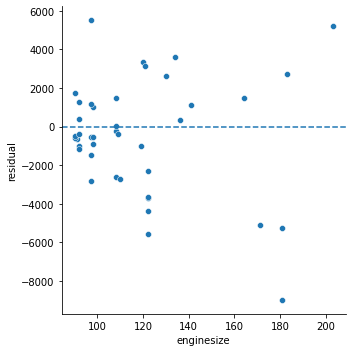

In [14]:
g = sns.relplot(data=final, x='enginesize', y='residual', kind='scatter')
for ax in g.axes.flat:
    ax.axhline(0, ls='--')

<AxesSubplot:xlabel='residual', ylabel='Density'>

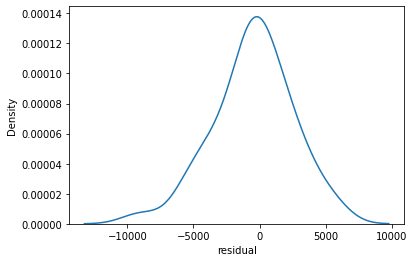

In [15]:
sns.kdeplot(data=final, x='residual')

In [16]:
final

,predictedPrice,enginesize,price,residual
0,14905.920686,136,15250.0,344.079314
1,7164.387613,90,8916.5,1752.112387
2,7500.976007,92,8778.0,1277.023993
3,26181.631901,203,31400.5,5218.868099
4,7500.976007,92,6488.0,-1012.976007
5,8342.446994,97,13845.0,5502.553006
6,7332.681810,91,6695.0,-637.681810
7,10193.683163,108,11694.0,1500.316837
8,12213.213530,120,15580.0,3366.786470
9,12381.507727,121,15510.0,3128.492273


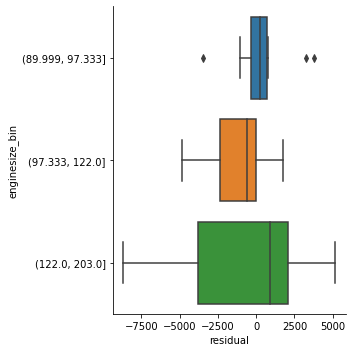

In [27]:
final["enginesize_bin"] = pd.qcut(final.enginesize, q=3)
sns.catplot(data = final , kind='box', y="enginesize_bin",x="residual" , orient='h')

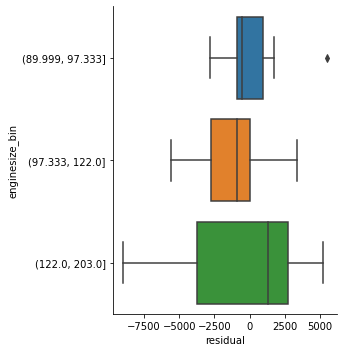

In [18]:
final["enginesize_bin"] = pd.qcut(final.enginesize, q=3)
sns.catplot(data = final , kind='box', y="enginesize_bin",x="residual" , orient='h')

# How to create a multiple regression model

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize','curbweight']], carsData[['price']], 
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)
# one variable r-squared = 0.7063964117029844

0.7581072748679534

In [20]:
model.score(x_train, y_train)

0.7950435284247739

In [21]:
y_predicted = model.predict(x_test)

## How to prepare and plot the multiple regression

In [23]:
# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a DataFrame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final.head()[['enginesize','curbweight','price','predictedPrice']]

,enginesize,curbweight,price,predictedPrice
0,136,2507,15250.0,14186.974331
1,90,1874,8916.5,5681.243299
2,92,3110,8778.0,12256.116157
3,203,3366,31400.5,26252.387995
4,92,2015,6488.0,6633.723732


## How to plot the residuals of a multiple regression

In [25]:
final['residual'] = final.price - final.predictedPrice
final.head()

,predictedPrice,enginesize,curbweight,price,residual
0,14186.974331,136,2507,15250.0,1063.025669
1,5681.243299,90,1874,8916.5,3235.256701
2,12256.116157,92,3110,8778.0,-3478.116157
3,26252.387995,203,3366,31400.5,5148.112005
4,6633.723732,92,2015,6488.0,-145.723732


<AxesSubplot:xlabel='residual', ylabel='Density'>

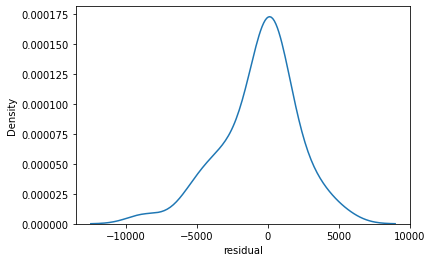

In [26]:
sns.kdeplot(data=final, x='residual')

## How to identify categorical variables

In [28]:
carsData.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## How to review categorical variables

### Dichotomous variables

In [29]:
carsData.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [30]:
carsData.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [31]:
carsData.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [32]:
carsData.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

### Nominal variables

In [33]:
carsData.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [34]:
carsData.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [35]:
carsData.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [36]:
carsData.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [37]:
carsData.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

## How to create dummy variables

In [38]:
catColumns = ['aspiration','doornumber','carbody','drivewheel']
dummies = pd.get_dummies(carsData[catColumns])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   aspiration_std       205 non-null    uint8
 1   aspiration_turbo     205 non-null    uint8
 2   doornumber_four      205 non-null    uint8
 3   doornumber_two       205 non-null    uint8
 4   carbody_convertible  205 non-null    uint8
 5   carbody_hardtop      205 non-null    uint8
 6   carbody_hatchback    205 non-null    uint8
 7   carbody_sedan        205 non-null    uint8
 8   carbody_wagon        205 non-null    uint8
 9   drivewheel_4wd       205 non-null    uint8
 10  drivewheel_fwd       205 non-null    uint8
 11  drivewheel_rwd       205 non-null    uint8
dtypes: uint8(12)
memory usage: 2.5 KB


In [40]:
carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.head(5)

,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,gas,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,front,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,gas,front,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,1,0
4,5,2,audi 100ls,gas,front,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,1,0,1,0,0


In [41]:
carsDummies.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


<AxesSubplot:>

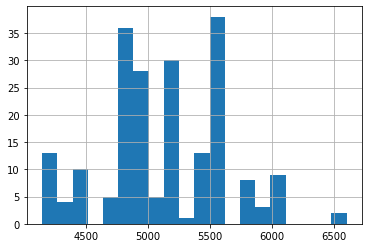

In [43]:
carsDummies.peakrpm.hist(bins=20)

<AxesSubplot:>

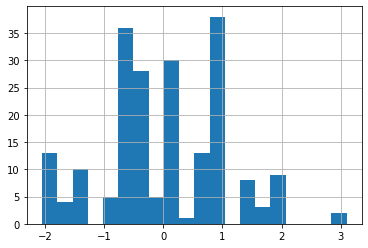

In [45]:
carsDummies.peakrpm.hist(bins=20)

In [46]:
carsDummies[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,-1.291108e-15,1.002448,-2.023713,-0.708596,-0.292420,0.606521,3.686225
carlength,205.0,3.656696e-15,1.002448,-2.677244,-0.629655,-0.069006,0.735404,2.766741
carwidth,205.0,1.089643e-15,1.002448,-2.620512,-0.844782,-0.190566,0.463650,2.987056
carheight,205.0,-5.372396e-16,1.002448,-2.430664,-0.707626,0.153893,0.728239,2.492302
curbweight,205.0,1.126470e-16,1.002448,-2.055348,-0.790449,-0.272552,0.730512,2.907988
enginesize,205.0,3.466062e-17,1.002448,-1.586561,-0.719947,-0.166277,0.339248,4.792679
boreratio,205.0,2.252940e-15,1.002448,-2.923049,-0.665314,-0.073121,0.926204,2.258638
stroke,205.0,2.062307e-15,1.002448,-3.789311,-0.464834,0.110556,0.494149,2.923575
compressionratio,205.0,-3.639365e-16,1.002448,-0.793101,-0.389299,-0.288349,-0.187398,3.244916
horsepower,205.0,1.819683e-16,1.002448,-1.422573,-0.864871,-0.231119,0.301233,4.661448


## How to rescale the data and check the correlations

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numCols = ['wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg']
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies.head()

,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,0,1,1,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,0,1,1,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,...,0,1,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,gas,front,0.173698,0.207256,0.136542,0.235942,-0.420797,...,1,0,0,0,0,1,0,0,1,0
4,5,2,audi 100ls,gas,front,0.107110,0.207256,0.230001,0.235942,0.516807,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
carsDummies.corr()[['price']].sort_values(by='price', ascending=False)

## How to create a multiple regression that includes dummy variables

In [71]:
carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2, 
    random_state=20)

In [67]:
model = LinearRegression()
xCols = ['enginesize','horsepower','carwidth',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[numCols], carsTrain['price'])

model.score(carsTest[numCols], carsTest['price'])
# two var - 0.7581072748679534
# xCols   = 0.7523820020019687
#numCols = 0.7230345089841743

0.5529909161599047

In [68]:
model.score(carsTrain[numCols], carsTrain['price'])

0.8772608249358436

In [59]:
y_predicted = model.predict(carsTest[xCols])

In [60]:
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

final = predicted.join([carsTest[xCols].reset_index(drop=True),
                        carsTest['price'].reset_index(drop=True)])

final[['enginesize','horsepower','carwidth','drivewheel_rwd',
       'highwaympg','price','predictedPrice']].head()

,enginesize,horsepower,carwidth,drivewheel_rwd,highwaympg,price,predictedPrice
0,0.218885,0.149133,0.183272,0,-0.837195,15250.0,13517.858822
1,-0.888455,-0.864871,-1.078431,0,1.783034,8916.5,5968.304606
2,-0.840310,-1.067671,-1.078431,0,0.181783,8778.0,4984.725918
3,1.831749,4.661448,2.987056,1,-0.400490,31400.5,37778.843127
4,-0.840310,-1.067671,-1.078431,0,1.055193,6488.0,5347.966676


## How to select the independent variables

<AxesSubplot:>

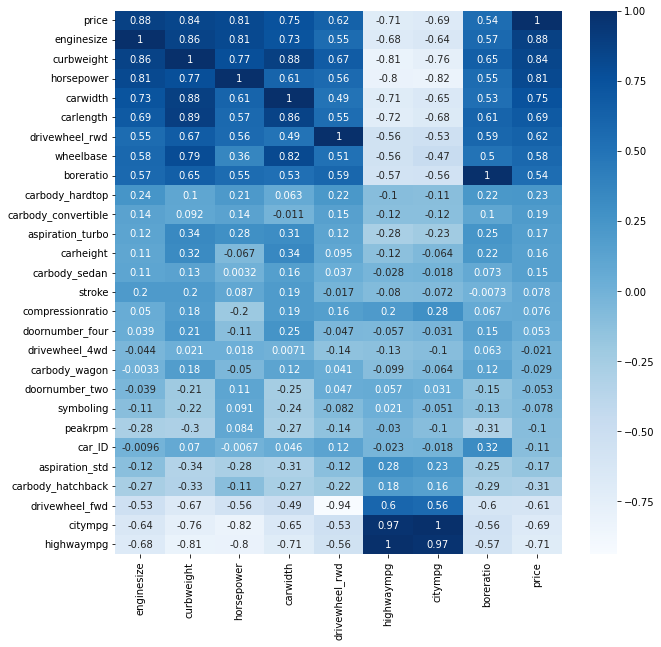

In [61]:
# use Matplotlib to set the size of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# create the heatmap
sns.heatmap(carsTrain.corr()[['enginesize','curbweight','horsepower','carwidth',
                              'drivewheel_rwd','highwaympg','citympg','boreratio',
                              'price']].sort_values(by='price', ascending=False), 
            cmap='Blues', annot=True)

In [62]:
numCols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

## How to test different combinations of variables

### An initial model that's fitted to eight independent variables

In [72]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth', 'carlength',
         'drivewheel_rwd','highwaympg','citympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.739243731429341

In [73]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8344434015448826

### The initial model without the citympg column

In [74]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth','carlength',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7430944903647659

In [75]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8339017954221501

### A model that's fitted to all the numeric and dummy variables

In [76]:
model = LinearRegression()
xCols = carsTrain.corr().drop(columns=['price']).columns.tolist()
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7741309452324634

In [77]:
model.score(carsTrain[xCols], carsTrain['price'])

0.893488927713899

## How to use SciKit learn to select the variables

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [79]:
carsTrain, carsTest = train_test_split(carsDummies.drop(
    columns=['CarName','fueltype','enginelocation','cylindernumber',
             'fuelsystem','enginetype']), test_size=0.2, random_state=20)

In [81]:
carsTrain.shape

(164, 28)

In [80]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

SelectKBest(k=20,
            score_func=<function mutual_info_regression at 0x0000026EAF5A8AF0>)

In [84]:
x_train_fs.shape

(164, 20)

In [83]:
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))

In [85]:
model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])

0.7730268917681574

In [86]:
model.score(x_train_fs, carsTrain['price'])

0.8826996202377456

In [87]:
df1 = pd.DataFrame(carsTrain.drop(columns=['price']).columns, columns=['feature'])
df1

,feature
0,car_ID
1,symboling
2,wheelbase
3,carlength
4,carwidth
5,carheight
6,curbweight
7,enginesize
8,boreratio
9,stroke


In [88]:
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False).head()

,feature,importance
6,curbweight,0.903108
11,horsepower,0.873773
14,highwaympg,0.856610
7,enginesize,0.852091
13,citympg,0.728160


In [89]:
model.coef_

array([-1.90687544e+01,  2.72306361e+02,  4.32995218e+02, -1.14369276e+03,
        1.97148554e+03,  8.67744003e+02, -2.92250332e+02,  4.36922690e+03,
       -9.66366120e+01, -7.85720335e+02,  8.41552841e+02,  2.00959317e+03,
        7.90090745e+02, -1.99040151e+03,  1.84819840e+03, -2.84136790e+00,
        2.84136790e+00, -1.33381041e+03, -3.95789388e+02,  2.02465059e+03])

In [90]:
model.intercept_

15064.778642923597

## How to select the right number of variables

<AxesSubplot:xlabel='numFeatures'>

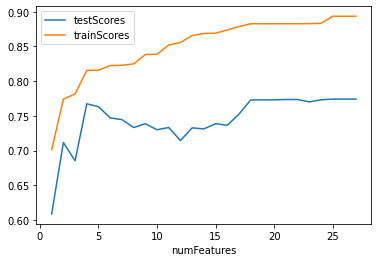

In [91]:
model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(carsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

    x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(carsTest.drop(columns=['price']))

    model.fit(x_train_fs, carsTrain['price'])
    
    testScore = model.score(x_test_fs, carsTest['price'])
    trainScore = model.score(x_train_fs, carsTrain['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)
    
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1


In [93]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x0000026EAF4C5A00>
File:           c:\python39\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' :

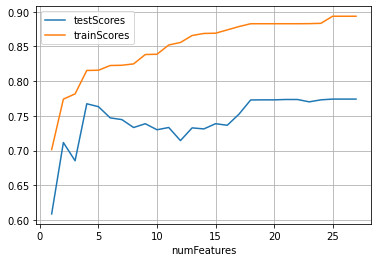

In [98]:
df['perf_gap'] = df['trainScores'] - df['testScores']
g = df.plot(x='numFeatures', y=['testScores','trainScores'], grid = True)

<AxesSubplot:xlabel='numFeatures'>

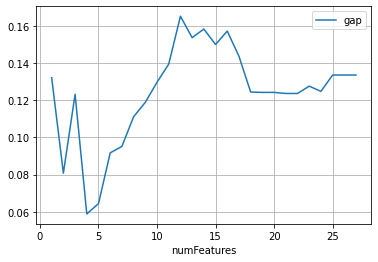

In [100]:
# Or, if you only want to plot the gap, you could do it like this...
df['gap'] = (df['trainScores'] - df['testScores'])/df['trainScores']
df.plot(x='numFeatures', y=['gap'], grid = True)